In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

%matplotlib inline

In [3]:
# dateparse = lambda dates : dates.str().strptime(dates, "%Y-%m-%d")
weather_data = pd.read_csv("D:\PROGRAMS\jupyter_programs\Kaiburr_19bce1629_task6\datasets\weatherHistory.csv")
weather_data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
weather_data.tail(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [5]:
del_cols = ['Summary', 'Apparent Temperature (C)', 'Precip Type', 'Temperature (C)' ,'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)' ,'Loud Cover' ,'Pressure (millibars)' ,'Daily Summary']
weather_data = weather_data.drop(columns=del_cols, axis=1)
weather_data

,Formatted Date,Humidity
0,2006-04-01 00:00:00.000 +0200,0.89
1,2006-04-01 01:00:00.000 +0200,0.86
2,2006-04-01 02:00:00.000 +0200,0.89
3,2006-04-01 03:00:00.000 +0200,0.83
4,2006-04-01 04:00:00.000 +0200,0.83
...,...,...
96448,2016-09-09 19:00:00.000 +0200,0.43
96449,2016-09-09 20:00:00.000 +0200,0.48
96450,2016-09-09 21:00:00.000 +0200,0.56
96451,2016-09-09 22:00:00.000 +0200,0.60


In [6]:
weather_data['DATE'] = (weather_data['Formatted Date'].str.split(" ",expand=True))[0]
weather_data = weather_data.drop('Formatted Date', axis=1)
weather_data.head()

,Humidity,DATE
0,0.89,2006-04-01
1,0.86,2006-04-01
2,0.89,2006-04-01
3,0.83,2006-04-01
4,0.83,2006-04-01


In [7]:
weather_data.info()
weather_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Humidity  96453 non-null  float64
 1   DATE      96453 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


,Humidity,DATE
0,0.89,2006-04-01
1,0.86,2006-04-01
2,0.89,2006-04-01
3,0.83,2006-04-01
4,0.83,2006-04-01
...,...,...
96448,0.43,2016-09-09
96449,0.48,2016-09-09
96450,0.56,2016-09-09
96451,0.60,2016-09-09


In [8]:
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Humidity  96453 non-null  float64       
 1   DATE      96453 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


In [9]:
daily_weather_data = round(weather_data.groupby(pd.Grouper(freq='D', key='DATE')).mean(), 2)
daily_weather_data

,Humidity
DATE,
2006-01-01,0.82
2006-01-02,0.84
2006-01-03,0.90
2006-01-04,0.91
2006-01-05,0.95
...,...
2016-12-27,0.89
2016-12-28,0.89
2016-12-29,0.89


Text(0.5, 1.0, 'Humidity')

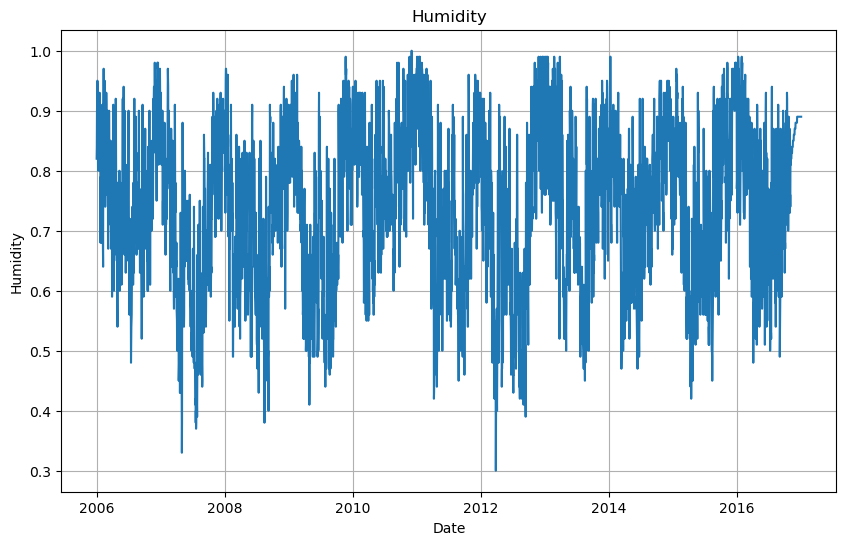

In [10]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Humidity")
plt.plot(daily_weather_data)
plt.title("Humidity")

<Axes: ylabel='Density'>

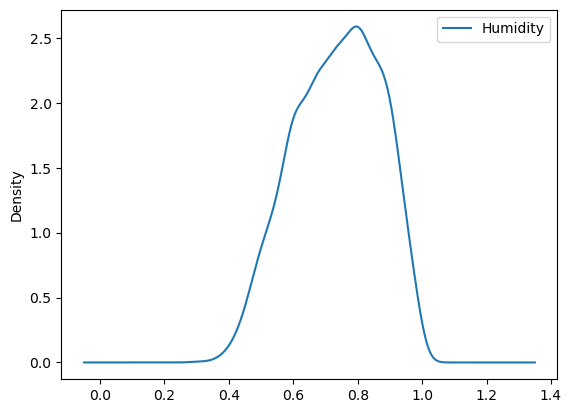

In [11]:
daily_weather_data.plot(kind='kde')

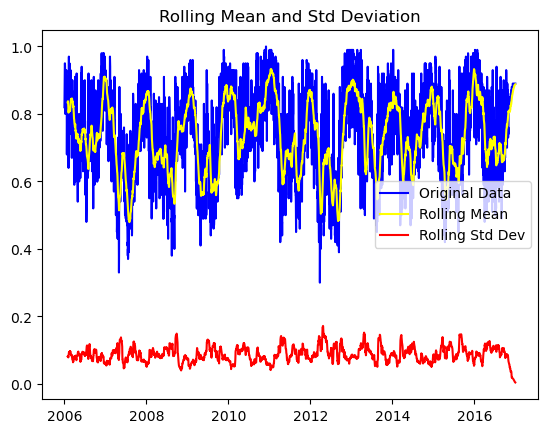

Results of Dickey-Fuller Test
Test Statistics             -6.24
p-value                      0.00
No. of Lags used            15.00
Number of observations    4002.00
critical value (1%)         -3.43
critical value (5%)         -2.86
critical value (10%)        -2.57
dtype: float64


In [12]:
def stationarity_test(daily_weather_data):
    # Rolling Mean and Std
    rolmean = daily_weather_data.rolling(30).mean()
    rolstd = daily_weather_data.rolling(30).std()

    plt.plot(daily_weather_data, color='blue', label='Original Data')
    plt.plot(rolmean, color="yellow", label="Rolling Mean")
    plt.plot(rolstd, color="red", label="Rolling Std Dev")
    plt.legend(loc='best')
    plt.title('Rolling Mean and Std Deviation')
    plt.show(block=False)

    print("Results of Dickey-Fuller Test")
    adft =  adfuller(daily_weather_data, autolag="AIC")
    
    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of Lags used', 'Number of observations'])

    for key, values in adft[4].items():
        output['critical value (%s) ' %key] = values
    print(round(output,2))

stationarity_test(daily_weather_data)

<Figure size 640x480 with 0 Axes>

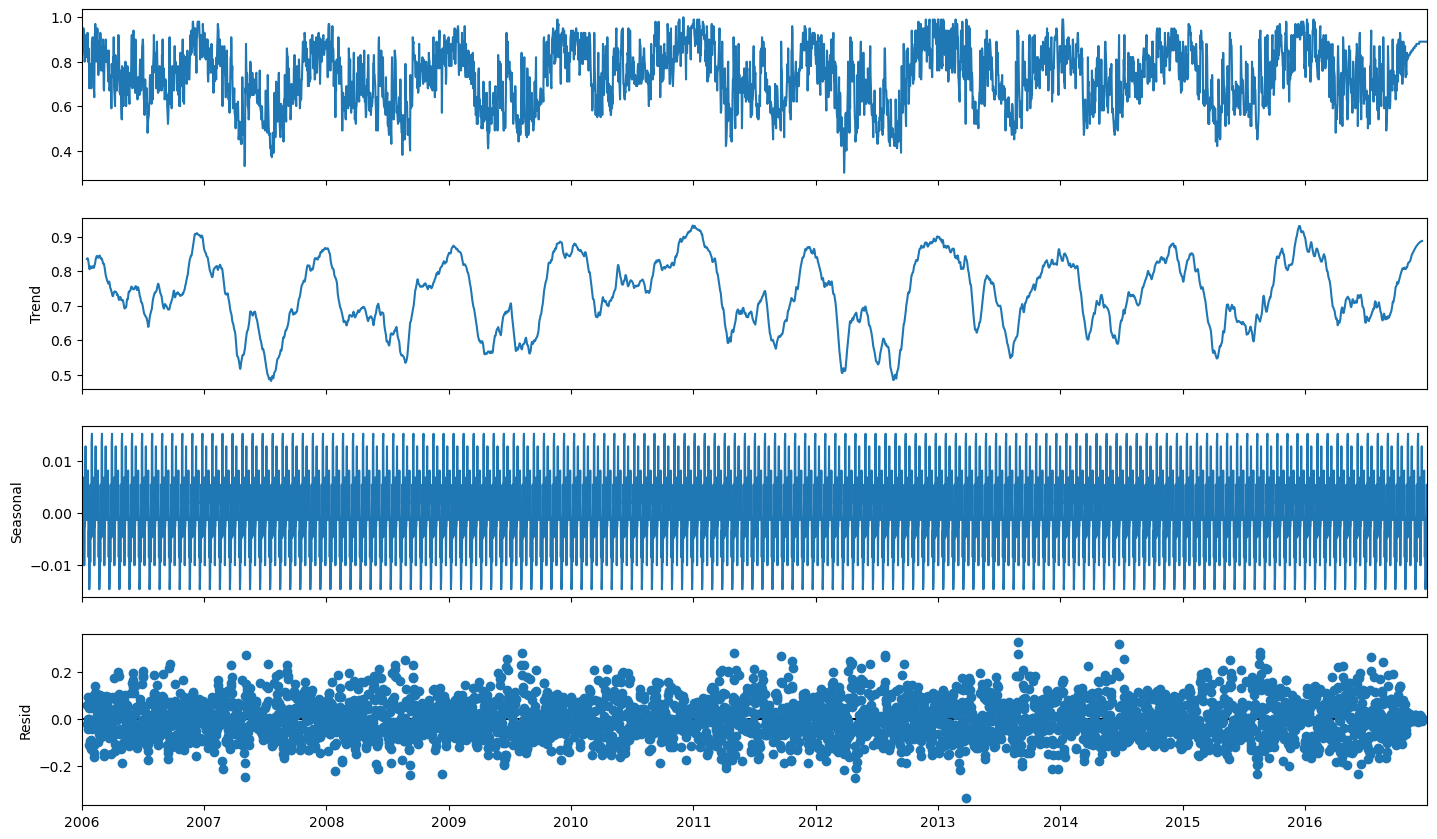

In [13]:
df_humid = daily_weather_data
result = seasonal_decompose(df_humid, model='additive', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


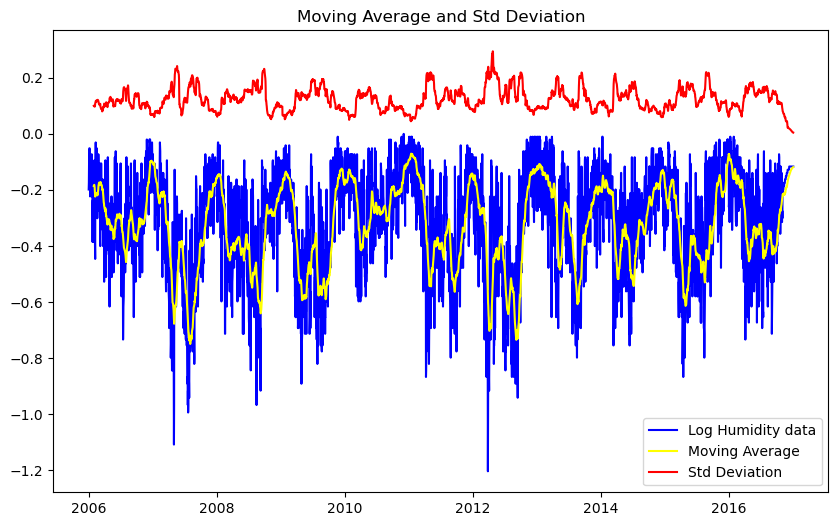

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(daily_weather_data)
mov_avg = df_log.rolling(30).mean()
std_dev = df_log.rolling(30).std()

plt.legend(loc='best')
plt.title("Moving Average and Std Deviation")
plt.plot(df_log, color='blue', label="Log Humidity data")
plt.plot(mov_avg, color='yellow', label='Moving Average')
plt.plot(std_dev, color='red', label='Std Deviation')
plt.legend()
plt.show()

In [15]:
# result_2 = seasonal_decompose(df_log, model='additive', period=30)
# fig = plt.figure()
# fig = result_2.plot()
# fig.set_size_inches(16,9)

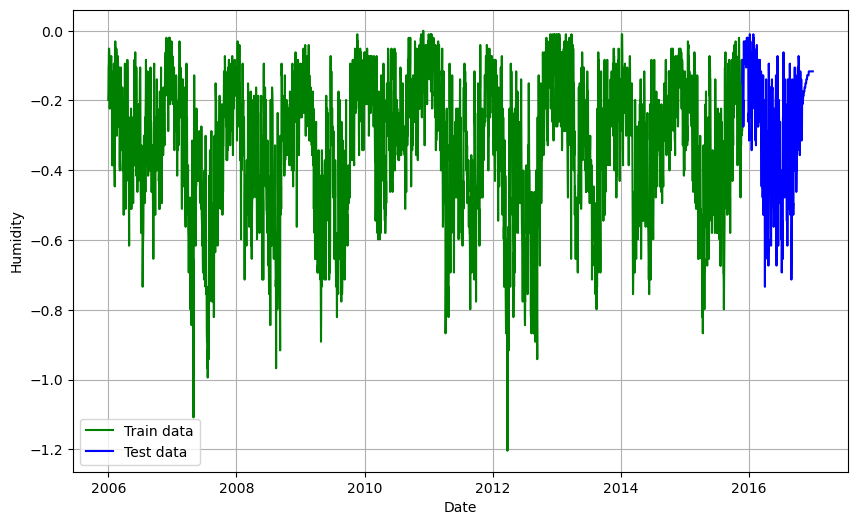

In [16]:
# Split the data into Train and Test Data
train, test = df_log[0:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.plot(train, 'green', label='Train data')
plt.plot(test, 'blue', label='Test data')
plt.legend()

In [17]:
test.shape

(402, 1)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3371.598, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5465.496, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-238.386, Time=0.28 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-5515.196, Time=0.31 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-5692.722, Time=0.54 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-5914.323, Time=1.54 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-5461.504, Time=0.79 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-5919.693, Time=1.54 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-5919.484, Time=1.44 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-5916.375, Time=1.93 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-5922.804, Time=2.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-5894.086, Time=1.50 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-5846.232, Time=0.96 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-5916.192, Time=2.58 sec

Best model:  ARIMA(2

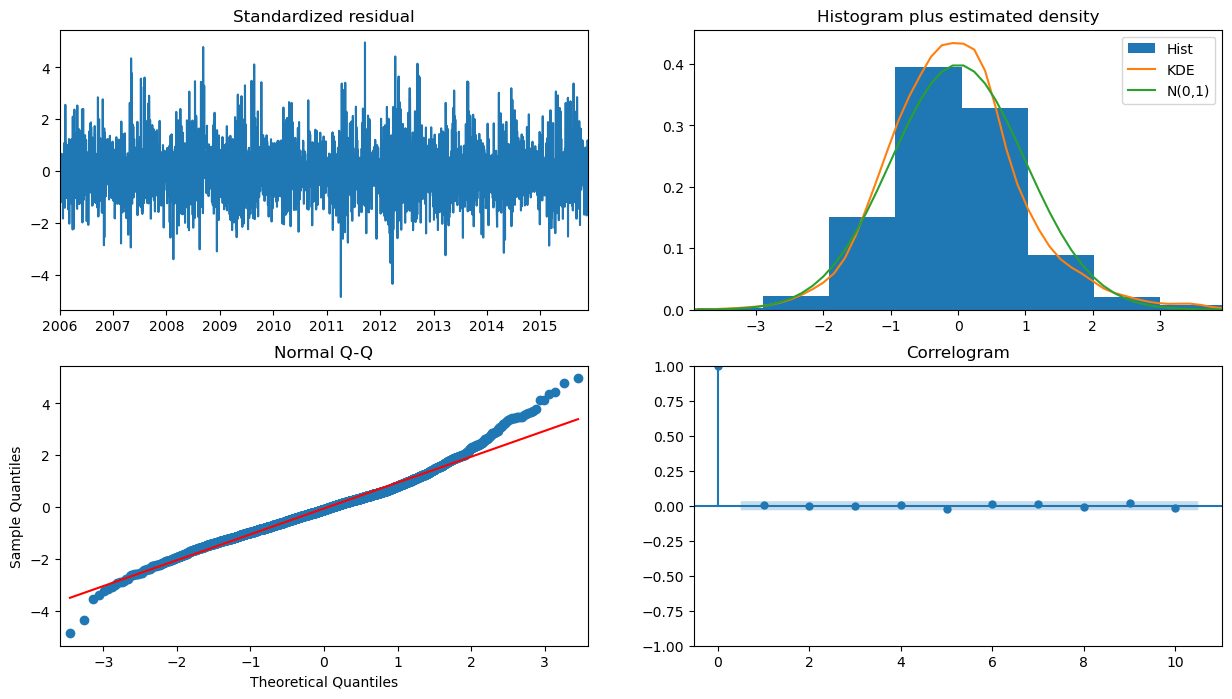

In [18]:
model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [19]:
# Building the Model
model = sm.tsa.ARIMA(train, order=(2,0,3))
fitted =    model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:               Humidity   No. Observations:                 3616
Model:                 ARIMA(2, 0, 3)   Log Likelihood                2980.239
Date:                Mon, 20 May 2024   AIC                          -5946.477
Time:                        12:26:34   BIC                          -5903.125
Sample:                    01-01-2006   HQIC                         -5931.031
                         - 11-25-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3288      0.030    -11.008      0.000      -0.387      -0.270
ar.L1          1.5742      0.082     19.097      0.000       1.413       1.736
ar.L2         -0.5814      0.080     -7.239      0.0

c:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
pred = fitted.get_forecast(402, alpha=0.25).summary_frame()
pred

c:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Humidity,mean,mean_se,mean_ci_lower,mean_ci_upper
2015-11-26,-0.203019,0.106116,-0.411003,0.004966
2015-11-27,-0.225889,0.131146,-0.482931,0.031153
2015-11-28,-0.233074,0.139141,-0.505786,0.039638
2015-11-29,-0.237944,0.144043,-0.520264,0.044376
2015-11-30,-0.241431,0.147474,-0.530475,0.047612
...,...,...,...,...
2016-12-27,-0.328706,0.195509,-0.711895,0.054484
2016-12-28,-0.328707,0.195509,-0.711897,0.054483
2016-12-29,-0.328708,0.195509,-0.711898,0.054482
2016-12-30,-0.328710,0.195509,-0.711899,0.054480


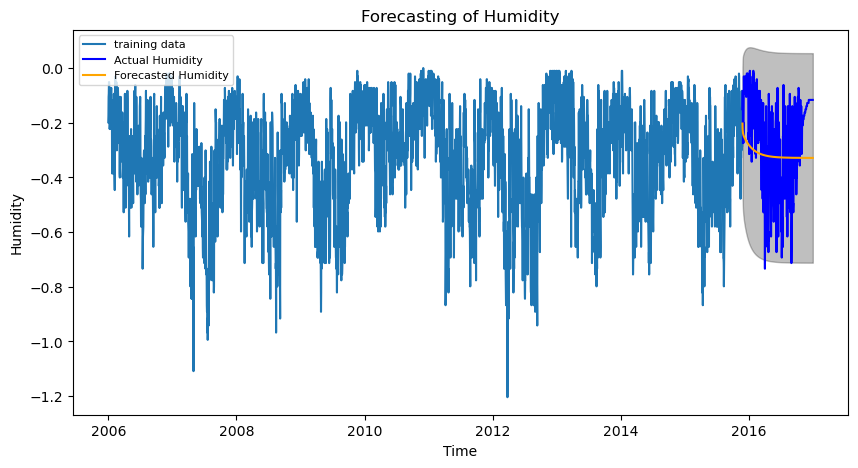

In [21]:
fc_series = pd.Series(pred['mean'].values, index=test.index)
lower_series = pd.Series(pred['mean_ci_lower'].values, index=test.index)
upper_series = pd.Series(pred['mean_ci_upper'].values, index=test.index)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='training data')
plt.plot(test, color = 'blue', label='Actual Humidity')
plt.plot(fc_series, color = 'orange',label='Forecasted Humidity')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.25)
plt.title('Forecasting of Humidity')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [28]:
mse = mean_squared_error(test, fc_series)
print("MSE", mse)
mae = mean_absolute_error(test, fc_series)
print("MAE", mae)
rmse = math.sqrt(mse)
print("RMSE", rmse)

MSE 0.027586068476444188
MAE 0.14358667769299222
RMSE 0.1660905430072531
